In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
crop_df = pd.read_csv('../data/Crop_recommendation.csv')
fert_df = pd.read_csv('../data/data_core.csv')

print("Crop rec shape:", crop_df.shape)
print("Fertilizer shape:", fert_df.shape)

display(crop_df.head())
display(fert_df.head())

Crop rec shape: (2200, 8)
Fertilizer shape: (8000, 9)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


In [3]:
display(crop_df.describe())
display(crop_df.isna().sum())
display(fert_df.describe())
display(fert_df.isna().sum())

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,30.338895,59.210731,43.580862,18.429125,3.916375,18.512500
std,4.478262,8.177366,12.596156,11.852406,5.494807,13.244113
min,20.000000,40.020000,20.000000,0.000000,0.000000,0.000000
25%,27.050000,53.277500,33.967500,9.000000,0.000000,8.000000
50%,30.240000,59.110000,42.250000,14.000000,1.000000,18.000000
75%,33.460000,65.082500,52.950000,26.000000,5.000000,30.000000
max,40.000000,80.000000,70.000000,46.000000,23.000000,46.000000


Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

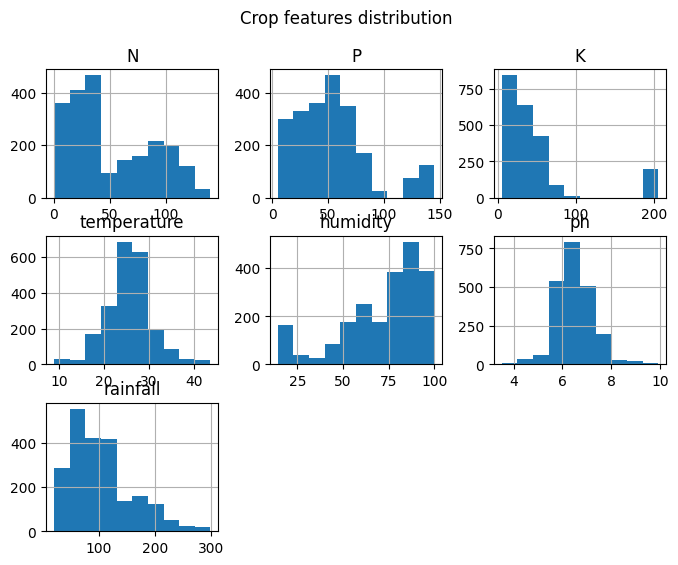

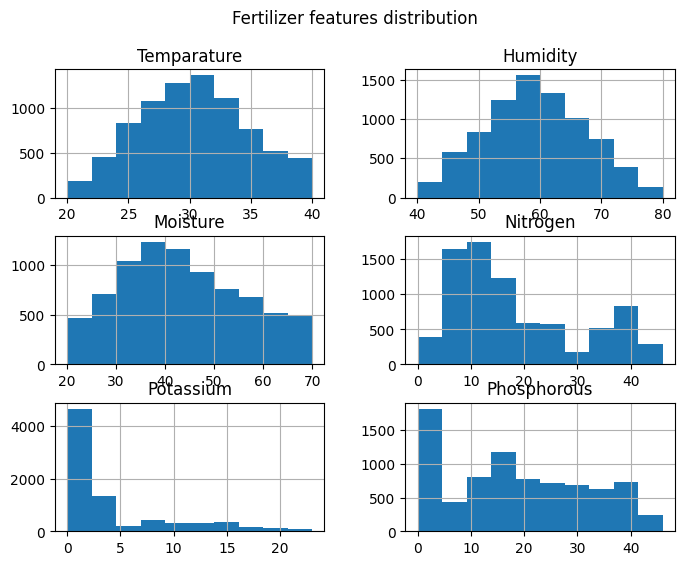

In [4]:
crop_df.hist(figsize=(8,6))
plt.suptitle("Crop features distribution")
plt.show()

fert_df.hist(figsize=(8,6))
plt.suptitle("Fertilizer features distribution")
plt.show()

In [13]:
import os
print(os.listdir('../data'))         # should show ['raw', 'processed', …]
     # should list your disease folders


['Crop_recommendation.csv', 'data_core.csv', 'Plant_leave_diseases_dataset_without_augmentation']


In [8]:
import os

# Where is Jupyter looking right now?
print("Working dir:", os.getcwd())

# What’s in that directory?
print("Contents:", os.listdir(os.getcwd()))

# What do you see under your data/ folder?
print("data/ contains:", os.listdir(os.path.join(os.getcwd(), 'data')))


Working dir: C:\mainproject\ai_farming_platform\notebooks
Contents: ['.ipynb_checkpoints', '02_data_exploration.ipynb', 'data']
data/ contains: ['Crop_recommendation.csv', 'data_core.csv', 'Plant_leave_diseases_dataset_with_augmentation']


Found classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy'] ...


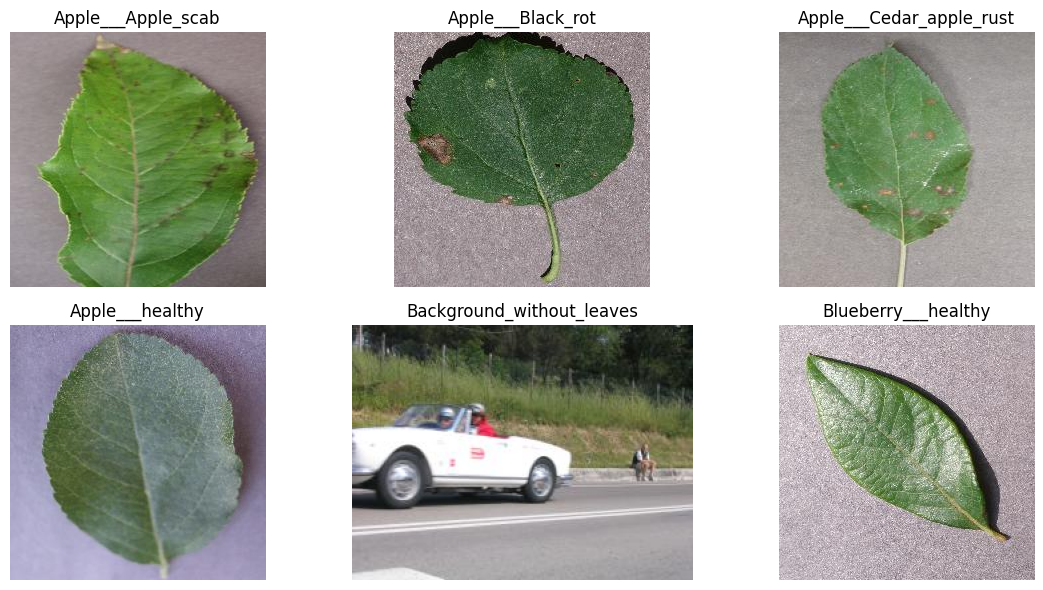

In [9]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# ── Adjust this path if your notebook lives in notebooks/ ──
# If notebooks/, use '../data/…'; otherwise 'data/…'
base = 'data/Plant_leave_diseases_dataset_with_augmentation'

# Verify path
if not os.path.exists(base):
    raise FileNotFoundError(f"❌ No such folder: {base}")

# List classes
classes = [d for d in os.listdir(base)
           if os.path.isdir(os.path.join(base, d))]

print("Found classes:", classes[:6], "...")

# Plot 6 sample images
fig, axes = plt.subplots(2, 3, figsize=(12,6))
for ax, cls in zip(axes.flatten(), classes[:6]):
    folder = os.path.join(base, cls)
    files  = os.listdir(folder)
    if not files: 
        continue
    img = Image.open(os.path.join(folder, files[0]))
    ax.imshow(img); ax.set_title(cls); ax.axis('off')

plt.tight_layout()
plt.show()
